In [8]:
### Dataframe manipulation and visualisation libraries
import pandas as pd
import numpy as np
import seaborn as sns

### Email reading libraries
import email
import mailbox
import csv

# Parsing mbox data to a csv format

In [77]:
writer = csv.writer(open("MailInfo.csv", "w", encoding = 'utf-8')) #w = write binary

for message in mailbox.mbox('new_mail.mbox'):
	writer.writerow([message['To'], message['From'],message['Date'], message['X-Gmail-Labels'], message['subject']]) #Add here mail's labels to show in the csv

# Importing the csv as a Pandas dataframe for easier manipulation of data

In [10]:
df1 = pd.read_csv('MailInfo.csv')

In [11]:
df2 = df1.dropna()

Reset the index of the dataframe

In [12]:
new_index = []
count = 0
for i in df2.index:
    new_index.append(count)
    count +=1
    
df2.index = new_index

Look at the head of the current dataframe to ensure that data has been loaded properly and that the index is reassigned correctly

In [13]:
df2.head()

,To,From,Date,Gmail Labels,Subject
0,<seansljh@gmail.com>,=?UTF-8?Q?Persona=20Nutrition?= <personanutrit...,"Thu, 20 Feb 2020 15:27:28 -0800","Inbox,Category Promotions,Unread",=?utf-8?Q?Kelly=20Ripa=20has=20joined=20the=20...
1,"""Lee Jun Hui, Sean"" <seansljh@gmail.com>","""gradsingapore"" <mail@gradsingapore.com>","Fri, 21 Feb 2020 02:07:58 -0600","Inbox,Opened,Category Promotions",Should you be doing an internship?
2,Sean Lee <seansljh@gmail.com>,Nicholas Teh via LinkedIn <invitations@linkedi...,"Tue, 4 Feb 2020 05:05:01 +0000 (UTC)","Inbox,Opened,Category Social","Sean, start a conversation with your new conne..."
3,Sean Lee <seansljh@gmail.com>,LinkedIn <jobs-listings@linkedin.com>,"Wed, 19 Feb 2020 17:33:03 +0000 (UTC)","Inbox,Category Social,Unread",ByteDance is looking for: Operation Intern.
4,Sean Lee <seansljh@gmail.com>,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,"Wed, 12 Feb 2020 15:29:46 +0000 (UTC)","Inbox,Category Updates,Unread",Sean: 30+ new jobs for 'intern'


Call df2.shape to get the dimensions of the dataframe (allows us to understand what we are working with)

In [14]:
df2.shape

(6064, 5)

Further understanding of the datatypes of the columns and to check whether there are any null values 

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6064 entries, 0 to 6063
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   To            6064 non-null   object
 1   From          6064 non-null   object
 2   Date          6064 non-null   object
 3   Gmail Labels  6064 non-null   object
 4   Subject       6064 non-null   object
dtypes: object(5)
memory usage: 284.2+ KB


Examining the values in the date column

In [16]:
df2.Date.unique()[:20]

array(['Thu, 20 Feb 2020 15:27:28 -0800',
       'Fri, 21 Feb 2020 02:07:58 -0600',
       'Tue, 4 Feb 2020 05:05:01 +0000 (UTC)',
       'Wed, 19 Feb 2020 17:33:03 +0000 (UTC)',
       'Wed, 12 Feb 2020 15:29:46 +0000 (UTC)',
       'Sun, 26 Jan 2020 20:38:45 +0000 (UTC)',
       'Sat, 15 Feb 2020 02:03:40 +0000',
       'Thu, 16 Jan 2020 16:47:16 +0000',
       'Fri, 14 Feb 2020 07:25:11 +0000',
       'Tue, 25 Feb 2020 16:00:59 +0800 (+08)',
       '1 Jan 2020 12:04:05 +0800',
       'Mon, 03 Feb 2020 00:00:00 +0000 (UTC)',
       'Tue, 11 Feb 2020 11:48:19 +0000',
       'Mon, 17 Feb 2020 13:38:10 +0530',
       'Sat, 22 Feb 2020 01:43:03 -0800',
       'Sun, 22 Dec 2019 06:30:55 +0000 (UTC)',
       'Sat, 15 Feb 2020 23:24:56 -0800',
       'Sat, 15 Feb 2020 06:52:55 -0800',
       'Sat, 18 Jan 2020 03:10:59 +0000 (UTC)',
       'Sat, 18 Jan 2020 01:46:00 +0000 (UTC)'], dtype=object)

Examining the values in the To Column

In [17]:
df2.To.unique()[:20]

array(['<seansljh@gmail.com>', '"Lee Jun Hui, Sean" <seansljh@gmail.com>',
       'Sean Lee <seansljh@gmail.com>', 'seansljh@gmail.com',
       '"Sean Lee" <Seansljh@gmail.com>',
       '"seansljh@gmail.com" <seansljh@gmail.com>',
       'Sean Lee <seansljh@gmail.com>, Sean Lee <seansljh@gmail.com>',
       'SEANSLJH@GMAIL.COM', 'NTU-PACE-ENEWSLETTER@MLIST.NTU.EDU.SG',
       '<SEANSLJH@GMAIL.COM>',
       '"seansljh@gmail.com" <seansljh@gmail.com>,\r\n        "E0325477@U.NUS.EDU"\r\n\t<E0325477@U.NUS.EDU>',
       'seansljh <seansljh@gmail.com>',
       '=?utf-8?Q??= <seansljh@gmail.com>',
       '"Lee Jun Hui Sean" <seansljh@gmail.com>',
       'Undisclosed recipients:;',
       '"Teh,Joanna,SINGAPORE,Human Resources" <Joanna.Teh@sg.nestle.com>',
       '"Por,Hui Fang,SINGAPORE,Human Resources" <HuiFang.Por@sg.nestle.com>',
       '"seansljh@gmail.com" <seansljh@gmail.com>,\r\n        "E0325477@U.NUS.EDU"\r\n\t<E0325477@U.NUS.EDU>,\r\n        "seansljh@gmail.com" <seansljh@gmail.com>

Examining the values in the From Column

In [18]:
df2.From.unique()[:20]

array(['=?UTF-8?Q?Persona=20Nutrition?= <personanutrition@news.personanutrition.com>',
       '"gradsingapore" <mail@gradsingapore.com>',
       'Nicholas Teh via LinkedIn <invitations@linkedin.com>',
       'LinkedIn <jobs-listings@linkedin.com>',
       'LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>',
       'SmileTutor <contactus@smiletutor.sg>',
       '=?utf-8?Q?Slidebean=20Templates=20Blog?= <templates@slidebean.co>',
       'Quora Digest <digest-noreply@quora.com>',
       '"BrightSparks" <brightsparks@jobscentral.com.sg>',
       '"KOI" <singapore@koicafe.com>',
       '"Medium Daily Digest" <noreply@medium.com>',
       'Supercell <noreply@id.supercell.com>',
       'Standard Chartered Singapore <sc.singapore@sc.com>',
       'Google <noreply-utos@google.com>',
       '"Airbnb" <invitation@airbnb.com>',
       'Google Docs <comments-noreply@docs.google.com>',
       '"Tobias Yap (Google Docs)" <comments-noreply@docs.google.com>',
       'Anamika Suresh via LinkedIn <mes

****

# Data Cleaning

Clean 'Date' column 
1. Convert it to a datetime object
2. Convert all datetime objects to that of the GMT+8 Format so we can make more valid comparisons

In [19]:
from datetime import datetime
import pytz

time_zone = pytz.timezone('Asia/Singapore')

def IsNumber(s): #Checks if a particular string is a number 
    try: 
        int(s)
        return True
    except ValueError:
        return False

def ConvertToDatetime(date):
    date=date.split(" ") #split by space
    if(IsNumber(date[0][0])): #is of some form where the number comes first
        if(len(date[1])==3): #if its of the form Day Mon 
            datetime_object = datetime.strptime(" ".join(date), '%d %b %Y %H:%M:%S %z')
        else: #if for the form dd/mm/yyyy
            datetime_object = datetime.strptime(" ".join(date), '%d/%B/%Y %H:%M')
    else:  #starts with characters instead
        if(len(date) == 5):
            datetime_object = datetime.strptime(" ".join(date), '%a, %d %b %Y %H:%M:%S %z')
        else:
            string = ""
            for i in range(0,6): #To deal with the case where the timezone e.g. (UTC) is appended at the end of the string 
                substr = date[i]
                string += substr
                if(i!=5):
                    string += " "
            datetime_object = datetime.strptime(string, '%a, %d %b %Y %H:%M:%S %z')
                
    return datetime_object

for i in df2.index:
    date_string = df2['Date'][i]
    date_string = ConvertToDatetime(date_string)
    date_string = date_string.astimezone(time_zone) #convert to GMT +8 for better comparison of datetime
    df2.loc[i, 'Date'] = date_string

C:\Users\65918\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\65918\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df2.head()

,To,From,Date,Gmail Labels,Subject
0,<seansljh@gmail.com>,=?UTF-8?Q?Persona=20Nutrition?= <personanutrit...,2020-02-21 07:27:28+08:00,"Inbox,Category Promotions,Unread",=?utf-8?Q?Kelly=20Ripa=20has=20joined=20the=20...
1,"""Lee Jun Hui, Sean"" <seansljh@gmail.com>","""gradsingapore"" <mail@gradsingapore.com>",2020-02-21 16:07:58+08:00,"Inbox,Opened,Category Promotions",Should you be doing an internship?
2,Sean Lee <seansljh@gmail.com>,Nicholas Teh via LinkedIn <invitations@linkedi...,2020-02-04 13:05:01+08:00,"Inbox,Opened,Category Social","Sean, start a conversation with your new conne..."
3,Sean Lee <seansljh@gmail.com>,LinkedIn <jobs-listings@linkedin.com>,2020-02-20 01:33:03+08:00,"Inbox,Category Social,Unread",ByteDance is looking for: Operation Intern.
4,Sean Lee <seansljh@gmail.com>,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2020-02-12 23:29:46+08:00,"Inbox,Category Updates,Unread",Sean: 30+ new jobs for 'intern'


****

Clean 'From' column
1. Extract out the portion of the string that contains the email address only 

In [21]:
def getEmail(email):
    email=email.split(" ") #split by space
    required = ""
    for substr in email:
        if(len(substr) >0): #check if it is not an empty string
            if substr[0] == '<': #check if this is the required part of the string we need "<....>"
                required = substr
                break;
            
    return required

for i in df2.index:
    email_string = df2['From'][i]
    email_string = getEmail(email_string)
    df2['From'][i] = email_string.lower() #to convert all letters to the same case for accurate aggregation later

C:\Users\65918\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df2.head()

,To,From,Date,Gmail Labels,Subject
0,<seansljh@gmail.com>,<personanutrition@news.personanutrition.com>,2020-02-21 07:27:28+08:00,"Inbox,Category Promotions,Unread",=?utf-8?Q?Kelly=20Ripa=20has=20joined=20the=20...
1,"""Lee Jun Hui, Sean"" <seansljh@gmail.com>",<mail@gradsingapore.com>,2020-02-21 16:07:58+08:00,"Inbox,Opened,Category Promotions",Should you be doing an internship?
2,Sean Lee <seansljh@gmail.com>,<invitations@linkedin.com>,2020-02-04 13:05:01+08:00,"Inbox,Opened,Category Social","Sean, start a conversation with your new conne..."
3,Sean Lee <seansljh@gmail.com>,<jobs-listings@linkedin.com>,2020-02-20 01:33:03+08:00,"Inbox,Category Social,Unread",ByteDance is looking for: Operation Intern.
4,Sean Lee <seansljh@gmail.com>,<jobalerts-noreply@linkedin.com>,2020-02-12 23:29:46+08:00,"Inbox,Category Updates,Unread",Sean: 30+ new jobs for 'intern'


Create a new label for whether the email was sent or recieved; i.e. isSent; where 1 refers to an email sent out by me and 0 refers to an email recieved

In [23]:
df2['isSent'] = 0 #Initialise a new column first with 0

df2.loc[df2.From == '<seansljh@gmail.com>', 'isSent'] = 1 #Set isSent as 1 if the sender is me 

C:\Users\65918\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\65918\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


****

Clean 'To' Column 
1. Like the cleaning for the 'From' Column, extract out only the email addresses portion. Have to keep in mind some are not in brackets this time.
2. Can engineer a new feature that can be quite interesting such as the number of people the email was sent to 

In [24]:
to_count = []

def getTo(email):
    count = 0
    to =email.split(" ") #split by space
    required = ""
    if(len(to) > 1): #check if it is in the "<>" format
        for substr in to:
            if(len(substr) >1): #Ensure not " "
                if substr[0] == '<': #check if this is the required part of the string we need "<....>"
                    required += substr
                    required += " "
                    count += 1
    else:
        if(to[0][0] != "<"): #Checks for the case if the email is in the form xxxx@xxxmail.com; allows for accurate aggregation later
            required = "<" + to[0] + "> "
        else:
            required = to[0] + " "
        count += 1
    to_count.append(count)
    return required[:-1] #Do this as all of the cases above have 1 trailing space at the end

for i in df2.index:
    email_string = df2['To'][i]
    email_string = getTo(email_string)
    df2['To'][i] = email_string.lower() #to convert all letters to the same case for accurate aggregation later

C:\Users\65918\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\65918\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
counts = pd.Series(to_count)
count_df = pd.DataFrame(counts, columns = ['To_Count'])
new_df = pd.concat([df2, count_df], axis = 1) #Add back to the original df

****

# Question:1
1. Plot a barchart of the number of emails sent and received in each year
2. Plot a breakdown of the number of emails received between June 2019 - August 2019 by From field(You can use fictitious names for the From sender to protect data privacy)

# General Approach (Q1.1)
1. Filter out all the records with date in the past 3 years 
2. Aggregate by the 'year' portion of the datetime object only

In [26]:
# Use aware timing for comparison

filtered_df = new_df[(new_df['Date'] >= datetime(year=2017,month=2,day=27).astimezone(time_zone)) # time_zone of GMT+8 from above
                    & (new_df['Date'] <= datetime(year=2020,month=2,day=27).astimezone(time_zone))]

In [27]:
#Group the dataframe by the year portion of the 'Date' column and do a count aggregation of the number of rows 
q11_df = filtered_df.groupby([pd.Grouper(key = 'Date', freq = 'Y'), pd.Grouper(key='isSent')]).agg('count').reset_index()

In [28]:
# Tidy up 'Date' portion to extract out 'year' part of datetime only 
q11_df.Date = q11_df.Date.apply(lambda x: x.year)

In [29]:
q11_df.drop(['From','Gmail Labels','Subject', 'To_Count'], axis = 1, inplace = True) #Drop the other 4 columns as irrelevant to this question
q11_df.rename({'Date':'Year', 'To': 'Count'}, axis = 1, inplace = True) #Rename for clarity

Text(0.5,1,'Barplot of emails sent and recieved in each year')

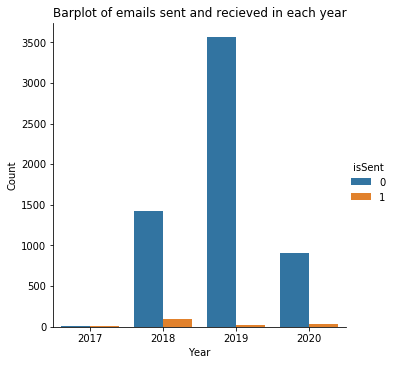

In [30]:
# Barplot
ax = sns.catplot(x = 'Year', y='Count', data = q11_df, kind = 'bar', hue = 'isSent')
axes = ax.axes.flatten()
axes[0].set_title("Barplot of emails sent and recieved in each year")

# General Approach (Q1.2)
1. Filter out all the records with date between June 2019 - August 2019
2. Do a groupby 'From' column 
3. Choice of visualisation here is to use a countplot as it shows us the counts of the different categorical groups

In [31]:
filtered_df_q12 = new_df[(new_df['Date'] >= datetime(year=2019,month=6,day=1).astimezone(time_zone)) 
                    & (new_df['Date'] <= datetime(year=2019,month=8,day=31).astimezone(time_zone)) & (new_df['isSent'] == 0)]

In [32]:
filtered_df_q12.drop(['Date','Gmail Labels','Subject', 'To_Count'], axis = 1, inplace = True) #Drop the other 4 columns as irrelevant to this question
filtered_df_q12.rename({'To': 'Count'}, axis = 1, inplace = True) #Rename for clarity

C:\Users\65918\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\65918\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


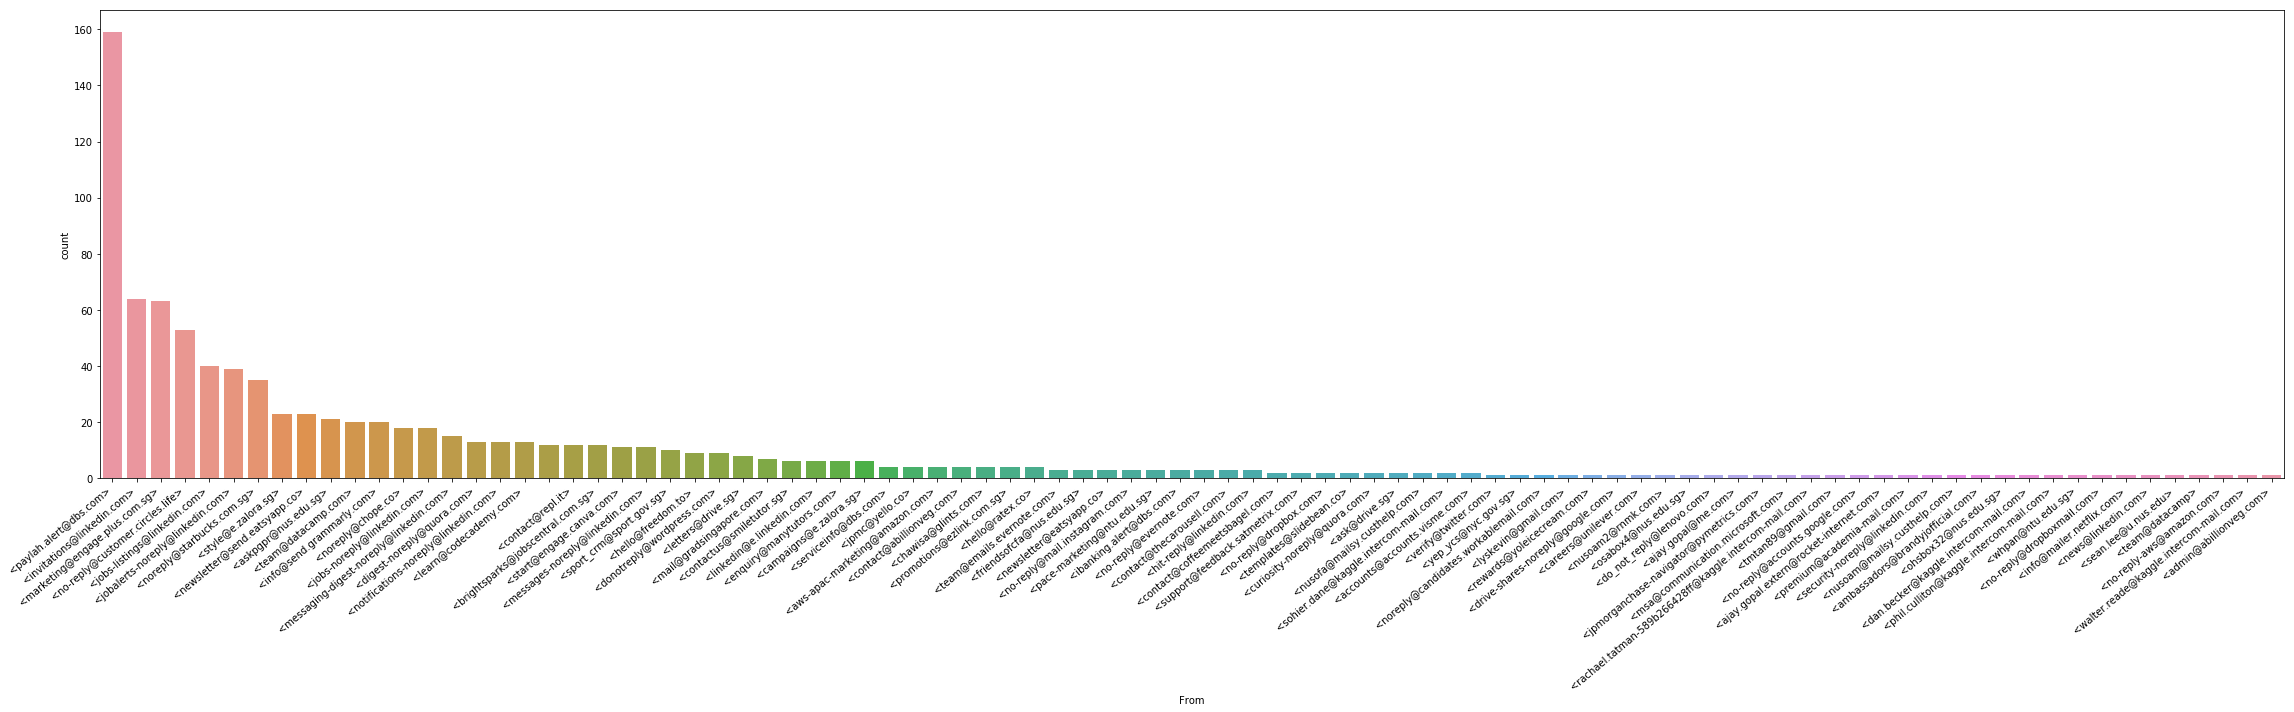

In [33]:
from matplotlib import pyplot as plt

fig_dims = (32, 10) #Adjust plot size since there are many categories being plotted
fig, ax2 = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x = 'From', data = filtered_df_q12, ax = ax2, order = filtered_df_q12['From'].value_counts().index) #sort by desending count

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotate x axis labels to make it more readable
plt.tight_layout()
plt.show()

****

# Question:2
 1. Categorize your emails based on labels and plot them.

# General Approach

1. Find out the current unique groups to decide if any breakdown is needed
2. Group by the groups and visualise it using catplots since the categories are categorical in nature

In [34]:
q2_df = new_df.copy()
q2_df['Gmail Labels'].unique()

array(['Inbox,Category Promotions,Unread',
       'Inbox,Opened,Category Promotions', 'Inbox,Opened,Category Social',
       'Inbox,Category Social,Unread', 'Inbox,Category Updates,Unread',
       'Inbox,Important,Category Promotions,Unread',
       'Inbox,Opened,Category Updates',
       'Inbox,Important,Opened,Category Updates',
       'Inbox,Important,Category Updates,Unread',
       'Category travel,Inbox,Important,Opened,Category Updates',
       'Inbox,Important,Opened,Category Promotions',
       'Inbox,Important,Category Social,Unread',
       'Inbox,Category Personal,Unread', 'Spam,Category Updates,Unread',
       'Inbox,Important,Opened,Category Social',
       'Inbox,Opened,Category Updates,Unread',
       'Inbox,Important,Opened,Category Personal',
       'Inbox,Opened,Category Personal', 'Sent', 'Sent,Opened',
       'Inbox,Important,Category Personal,Unread',
       'Category travel,Inbox,Important,Category Updates,Unread',
       'Inbox,Category Social', 'Important,Bin,O

Can do create new columns which show the L1 - L3 Email Category, which refers to the order in which Gmail has categorised the emails into; 

    Eg. for 'Inbox, Opened, Category Promotions, Starred';
    L1 = Inbox, L2 = Opened, L3 = Category Promotions

In [35]:
L1L3Cat = {'L1': [], 'L2':[],'L3':[]} #Initialise a dictionary to store the values 

for i in q2_df.index:
    cats = q2_df['Gmail Labels'][i].split(',')
    if len(cats) >= 3: #Need to consider cases as the number of categories in the gmail labels column range in length from 1 onwards
        L1L3Cat['L1'].append(cats[0])
        L1L3Cat['L2'].append(cats[1])
        L1L3Cat['L3'].append(cats[2])
    elif len(cats) == 2:
        L1L3Cat['L1'].append(cats[0])
        L1L3Cat['L2'].append(cats[1])
        L1L3Cat['L3'].append('Nil')
    elif len(cats) == 1:
        L1L3Cat['L1'].append(cats[0])
        L1L3Cat['L2'].append('Nil')
        L1L3Cat['L3'].append('Nil')

In [36]:
cat_df = pd.DataFrame(L1L3Cat) #Convert to pandas df

In [37]:
q2_df_final = pd.concat([q2_df, cat_df], axis = 1) #Add back to df

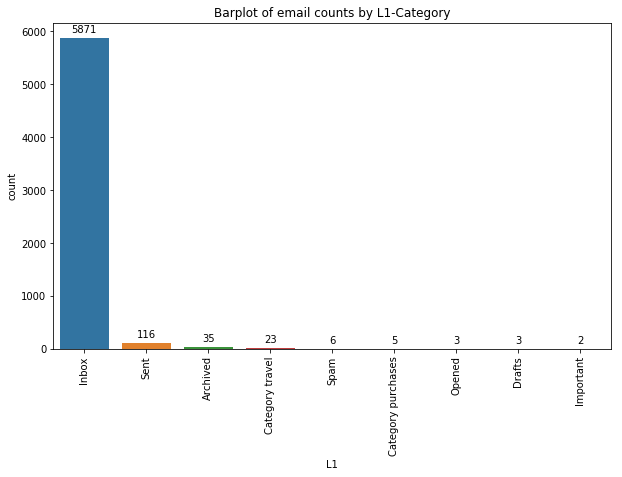

In [38]:
### Visualise the emails across different categories using countplots
### Looking at a general countplot using L1 Cat first

fig_dims = (10, 6) #Adjust plot size since there are many categories being plotted
fig, ax2 = plt.subplots(figsize=fig_dims)
graph = sns.countplot(x = 'L1', data = q2_df_final, ax = ax2, order = q2_df_final['L1'].value_counts().index)

graph.set_title('Barplot of email counts by L1-Category')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches: #Show counts above the bars directly since some of the bars are too small to be seen
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2, height + 100,
        q2_df_final['L1'].value_counts()[i],ha="center")
    i += 1
    

Most of the mails I have are recieved from other people (5872!) - Would be interesting to look at the breakdown within this huge chunk more

Text(0.5,1,'Barplot of email counts by L2-Category for L1-Category = Inbox')

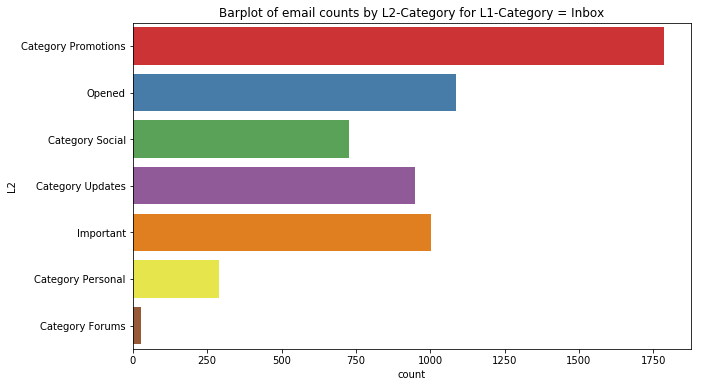

In [39]:
### Doing a barplot to show the breakdown within 'Inbox'
fig_dims = (10, 6) #Adjust plot size since there are many categories being plotted
fig, ax2 = plt.subplots(figsize=fig_dims)

q2_df_final_l1 = q2_df_final[q2_df_final.L1 == 'Inbox']
graph =  sns.countplot(y = 'L2', data = q2_df_final_l1, ax = ax2, palette = sns.color_palette("Set1", n_colors = 8))

graph.set_title('Barplot of email counts by L2-Category for L1-Category = ''Inbox''')

Question:3
1. Explore the data and identify two other possible insights that you can get from the
data.

I would like to explore whether the number of recipients in the 'To' section of an email is related to whether I was the one that sent the email or not

In [40]:
q3_df = q2_df_final.copy() #Create a copy of the df in q2 with all the relevant metrics

C:\Users\65918\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Violin plot of Number of reciepients in email by isSent')

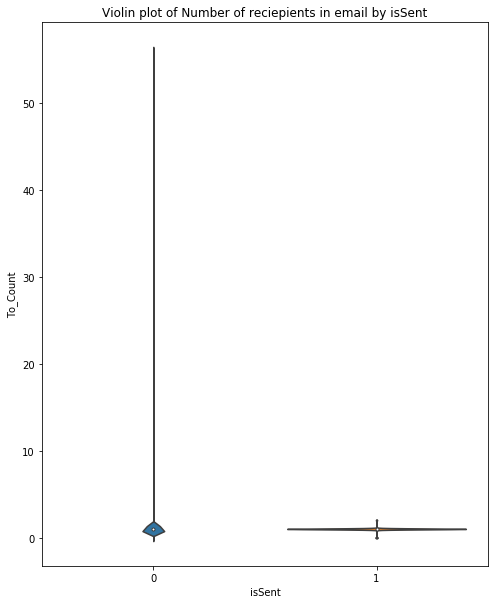

In [41]:
fig_dims = (8, 10) #Adjust plot size since there are many categories being plotted
fig, ax2 = plt.subplots(figsize=fig_dims)
sns.violinplot(x = 'isSent', y='To_Count', data = q2_df_final, ax = ax2).set_title('Violin plot of Number of reciepients in email by isSent')

From the above, we can see that bulk of the messages that I have sent out tend to have 1 recepient only, while for the messages I recieved, even though bulk of them are sent explicitly to me only, there is also a sizable portion that is sent to multiple people too

****

I would like to explore the most common words that appeared in the subject header of all my emails in the mailbox

In [43]:
q32 = new_df.copy()

In [44]:
###Create a dictionary to store the word, with the value as the count of the particular word
dict_counts  = {}

for i in q32.index:
    sub = q32['Subject'][i].split(" ")
    for sub_string in sub:
        if sub_string in dict_counts.keys():
            dict_counts[sub_string] +=1
        else:
            dict_counts[sub_string] = 1

In [45]:
import operator
sorted_d = dict(sorted(dict_counts.items(), key=operator.itemgetter(1),reverse=True))

In [46]:
new_dict = {'word':[], 'count':[]}

for k,v in sorted_d.items():
    new_dict['word'].append(k)
    new_dict['count'].append(v)

In [47]:
wordCountdf = pd.DataFrame.from_dict(new_dict)

Using the nltk package to help us remove some of the commonly seen stop words in the English Language to allow for more interesting and insightful analysis

In [49]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [52]:
wordCountdf = wordCountdf[~wordCountdf['word'].isin(stopwords)] #Extract words not in the commonly used stopwords

In [53]:
#Filter top 30 words 
wordCountT30 = wordCountdf.iloc[0:30]

Text(0.5,1,'Barplot of words and their counts in mailbox')

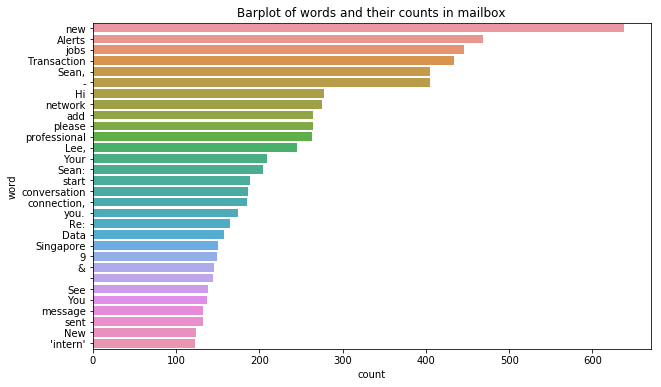

In [54]:
fig_dims = (10, 6) #Adjust plot size since there are many categories being plotted
fig, ax2 = plt.subplots(figsize=fig_dims)
graph = sns.barplot(y = 'word', x ='count' , data = wordCountT30, ax = ax2)
graph.set_title('Barplot of words and their counts in mailbox')

****

I would also like to explore whether there are any seasonal trends in the number of emails that I recieved in the past 3 years

In [373]:
#Group the dataframe by the year portion of the 'Date' column and do a count aggregation of the number of rows 
filtered_df = new_df[(new_df['Date'] >= datetime(year=2017,month=2,day=27).astimezone(time_zone)) # time_zone of GMT+8 from above
                    & (new_df['Date'] <= datetime(year=2020,month=2,day=27).astimezone(time_zone))]
q33_df = filtered_df.groupby(pd.Grouper(key = 'Date', freq = 'M')).agg('count').reset_index()

In [374]:
q33_df.drop(['From', 'Gmail Labels', 'Subject', 'isSent', 'To_Count'], axis = 1, inplace = True)
q32_df = q32_df.rename({'To':'Number of Emails'}, axis = 1)

In [375]:
q33_df = q33_df.sort_values(by = ['Date'])

Convert datetime objects back to string so we can plot it using a lineplot

In [377]:
q33_df.Date = q33_df.Date.apply(lambda x: x.strftime('%Y %b'))

Text(0.5,1,'Time Series of email counts')

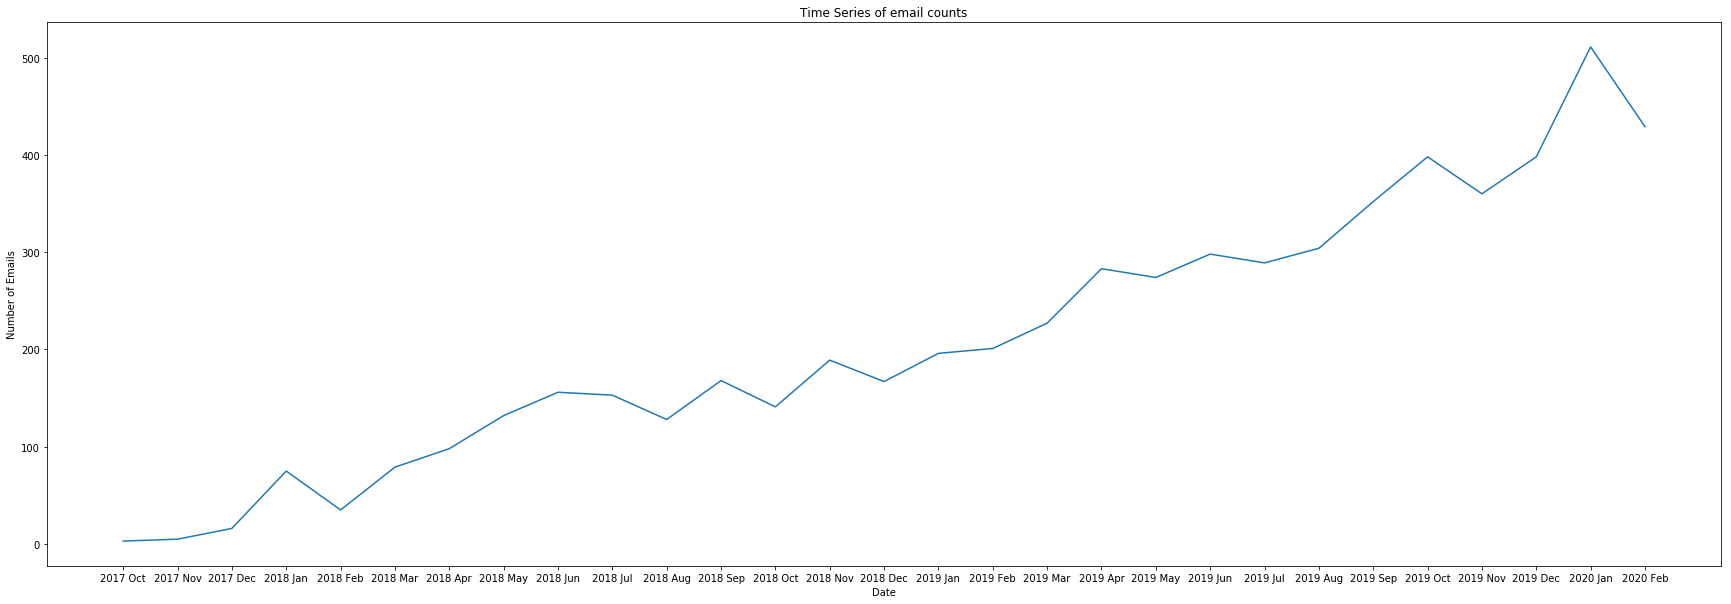

In [383]:
fig_dims = (30, 10) #Adjust plot size since there are many categories being plotted
fig, ax2 = plt.subplots(figsize=fig_dims)
graph = sns.lineplot(x = 'Date', y = 'Number of Emails',data = q33_df, sort = False) #set sort = False as otherwise it sorts the string representation of dates in ascending format
graph.set_title('Time Series of email counts')

Gradual steady increase as I start to use this email more for my professional matters. Peaked in Jan 2020 as I was looking out for internships then 